##### Axial Unrolling

**Act 5**

_Oct 26 - _

### Unrolling along the object axis

Next, we're unrolling the object by taking pixels from its vertical axis.

I found an error through using the thresholding using yen (and otsu) methods which fails for some values. I'm gonna have to separate object from the root image using some other thresholding (perhaps local thresholding) method.

In [1]:
# Get required stuff here

%matplotlib inline

import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.color
import skimage.segmentation
import skimage.util
import skimage.util.colormap

import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from collections import namedtuple

In [2]:
## Bring back some handy methods defined earlier.
root_images = namedtuple('RootImages', ['root', 'grey', 'bin', 'name', 'thin'])

def get_image(path):
  '''Return tuple of pre-processed image.'''
  root = skimage.io.imread(path)
  grey = skimage.color.rgb2gray(root)
  
  # Using `yen` thresholds.
  threshold = skimage.filters.thre(grey)
  binary = grey < threshold

  # Get the thin axis morphology of the image as well.
  thin = skimage.morphology.thin(binary)
  return root_images(root, grey, binary, os.path.basename(path), thin)

## Unrolling shapes on a central line

Below, I demonstrate unrolling of shapes using a single line approach. Essentially, we take pixel values from a specific region of each frame.

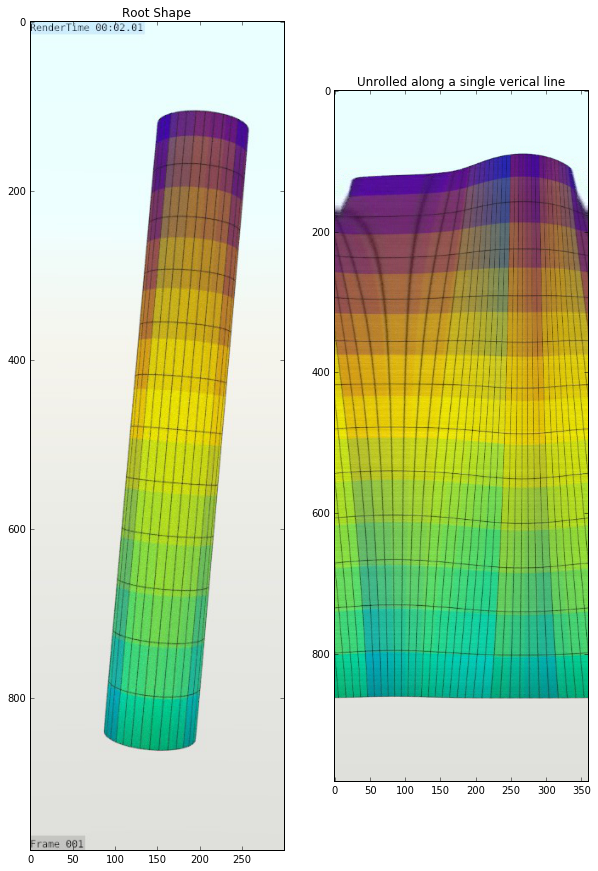

In [4]:
tilt_cyl_imgs = sorted(glob.glob('./tmp/tilt_cyl_3/*.jpg'))


slices = [skimage.io.imread(f)[:,145:146,:] for f in tilt_cyl_imgs]
joined = np.concatenate(slices, axis=1)

img_tilt_cyl = get_image(tilt_cyl_imgs[0])

plt.figure(2, figsize=(10, 20))

plt.subplot(121)
plt.title('Root Shape')
plt.imshow(img_tilt_cyl.root)

plt.subplot(122)
plt.title('Unrolled along a single verical line')
plt.imshow(joined)

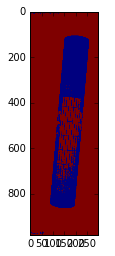

In [40]:
plt.imshow(img_tilt_cyl.grey > skimage.filters.threshold_otsu(img_tilt_cyl.grey, nbins=2000))